# Barbershop problem
There are 3 possible scenarios we need to consider:

-The customer in front also prefers Tiffany
-The customer in front doesn't mind but Tiffany is the next barber available
-The customer in front doesn't mind and Tiffany is not the next barber available

The first scenario is trivial. We must wait the expected time for Tiffany to finish her current cut as well as another 15 minutes for TIffany to finish the customer in front.

The second and third scenarios require us to consider both the probability that Tiffany is the next barber available as well as the expected ammount of Time until Tiffany finishes her current cut in each of those scenarios. We have p(tiffany finishes first) x p(time for tiffany to finish|tiffany finishes first) = p(tiffany finishes first|time for tiffany to finish) x p(time to finish) = (1-t)^(n-1)

We can write these scenarios in a general integral form for all probabilities c of the customer in front being picky and for n barbers and integrate for all t (we have normalised time to between 0 and 1 since the unit of time is arbitrary). 



Since time is by construction between 0 and 1, all powers of t are one. This allows us to simplify the expression further. Finally we rescale by t=15 to get the solution.

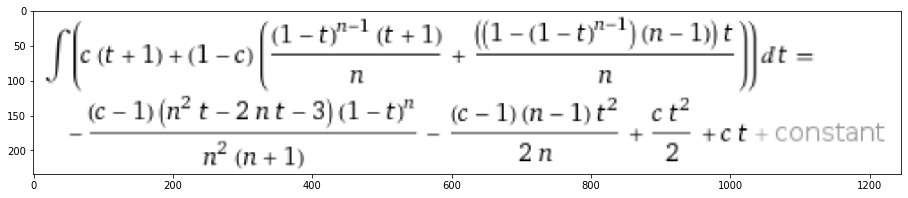

In [7]:
#Show the integral
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (20,3)
img = mpimg.imread('integral.png')
plt.imshow(img)
plt.show()

In [3]:
import numpy as np

def expected_wait(c,n,t):
    t_coefs=np.zeros(n+1)
    t_coefs[0]=c
    t_coefs[1]=1/2
    t_coefs[n]=(1-c)*1/n
    out=t_coefs
    return out.sum()*t

In [4]:
expected_wait(0.25,4,15)

14.0625

In [303]:
#Choose a range of probabilities
c = np.linspace(0, 1, 10)
#Choose a range of number of barbers
n = np.linspace(4, 8, 5).astype(int)
xv, yv = np.meshgrid(n, c)
zv=np.zeros((len(c),len(n)))

In [304]:
for i in range(len(c)):
    for j in range(len(n)):
        zv[i,j]=expected_wait(c[i],n[j],15)

Text(0, 0.5, 'probability of other customer being picky')

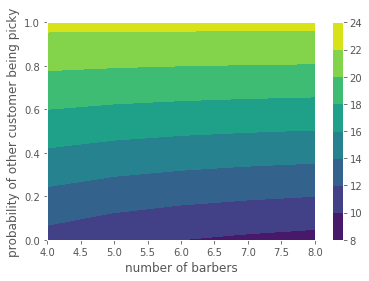

In [308]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.contourf(xv,yv,zv) #reshape Z too!
plt.colorbar()
plt.xlabel('number of barbers')
plt.ylabel('probability of other customer being picky')